In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
imdb = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding = 'latin-1')

In [5]:
imdb

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
display(imdb.head())
display(imdb.tail())

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [7]:
imdb.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [8]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
"""#!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

av = AutoViz_Class()
a = av.AutoViz(imdb)

import os
os.getcwd()

# If the dependent variable is known:
a = av.AutoViz(imdb)"""

'#!pip install autoviz\nfrom autoviz.AutoViz_Class import AutoViz_Class\n\nav = AutoViz_Class()\na = av.AutoViz(imdb)\n\nimport os\nos.getcwd()\n\n# If the dependent variable is known:\na = av.AutoViz(imdb)'

In [10]:
"""!pip install sweetviz
import sweetviz as sv

s = sv.analyze(imdb)
s.show_html()"""

'!pip install sweetviz\nimport sweetviz as sv\n\ns = sv.analyze(imdb)\ns.show_html()'

In [11]:
imdb.isna().sum()/len(imdb)*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [12]:
imdb.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [13]:
imdb.shape

(15509, 10)

In [14]:
imdb.duplicated().any()

True

In [15]:
imdb.duplicated().sum()

6

In [16]:
imdb.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
imdb.isna().sum()/len(imdb)*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

<Axes: >

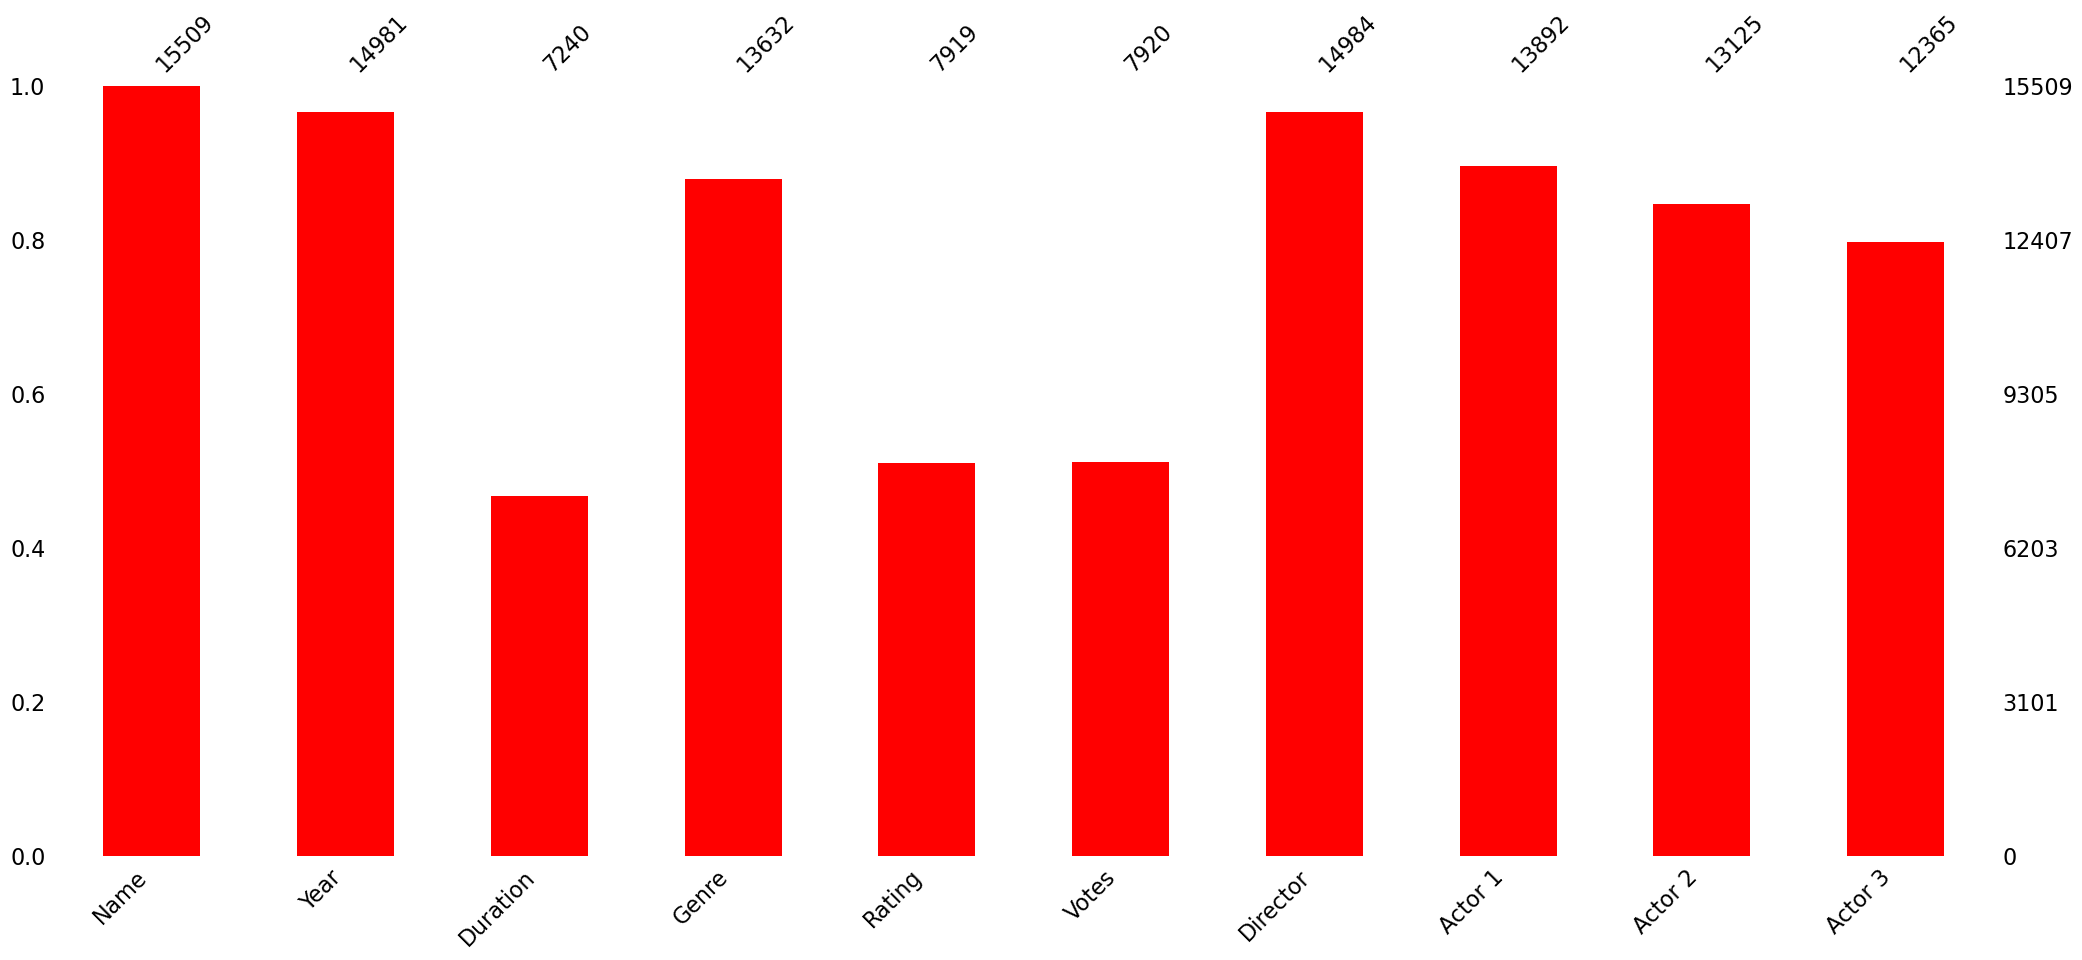

In [18]:
import missingno as msn
msn.bar(imdb, color = 'red')

In [19]:
# As we are going to predict movie ratings based on features, we need to remove null values from features that can directly influence the results.
imdb.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True) 
imdb.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [20]:
#imdb.dropna(inplace = True)

In [21]:
imdb

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [22]:
imdb.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [23]:
# Remove parentheses from 'Year' column and convert to integer
imdb['Year'] = imdb['Year'].str.strip('()').astype(int)


# Remove commas from 'Votes' column and convert to integer
imdb['Votes'] = imdb['Votes'].str.replace(',', '').astype(int)


# Remove min from 'Duration' column andDurationonvert to integer
imdb['Duration'] = imdb['Duration'].str.replace('min', '').astype(int)

imdb.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 502.8+ KB


In [24]:
imdb.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [25]:
# Drop Genre column 
imdb.drop('Genre',axis=1,inplace=True)

In [26]:
imdb.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<Axes: xlabel='Votes'>

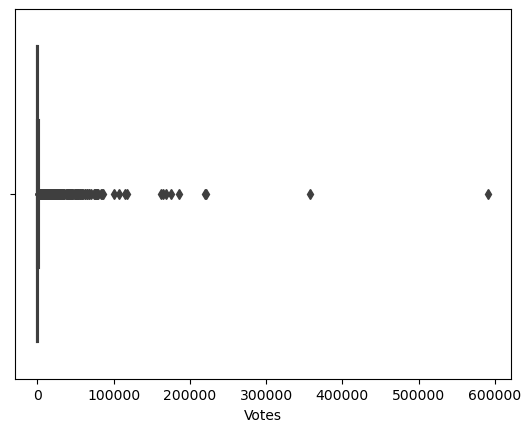

In [27]:
sns.boxplot(x = 'Votes', data = imdb)

<Axes: xlabel='Year', ylabel='Density'>

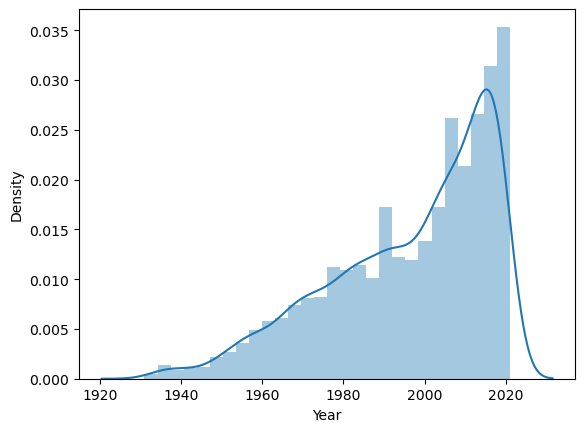

In [28]:
sns.distplot(imdb['Year'])

<Axes: xlabel='Duration', ylabel='Rating'>

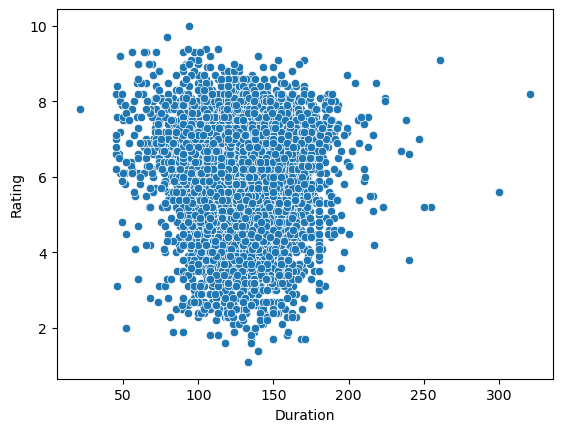

In [29]:
sns.scatterplot(x=imdb['Duration'], y=imdb['Rating'], data=imdb)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Votes'}>]], dtype=object)

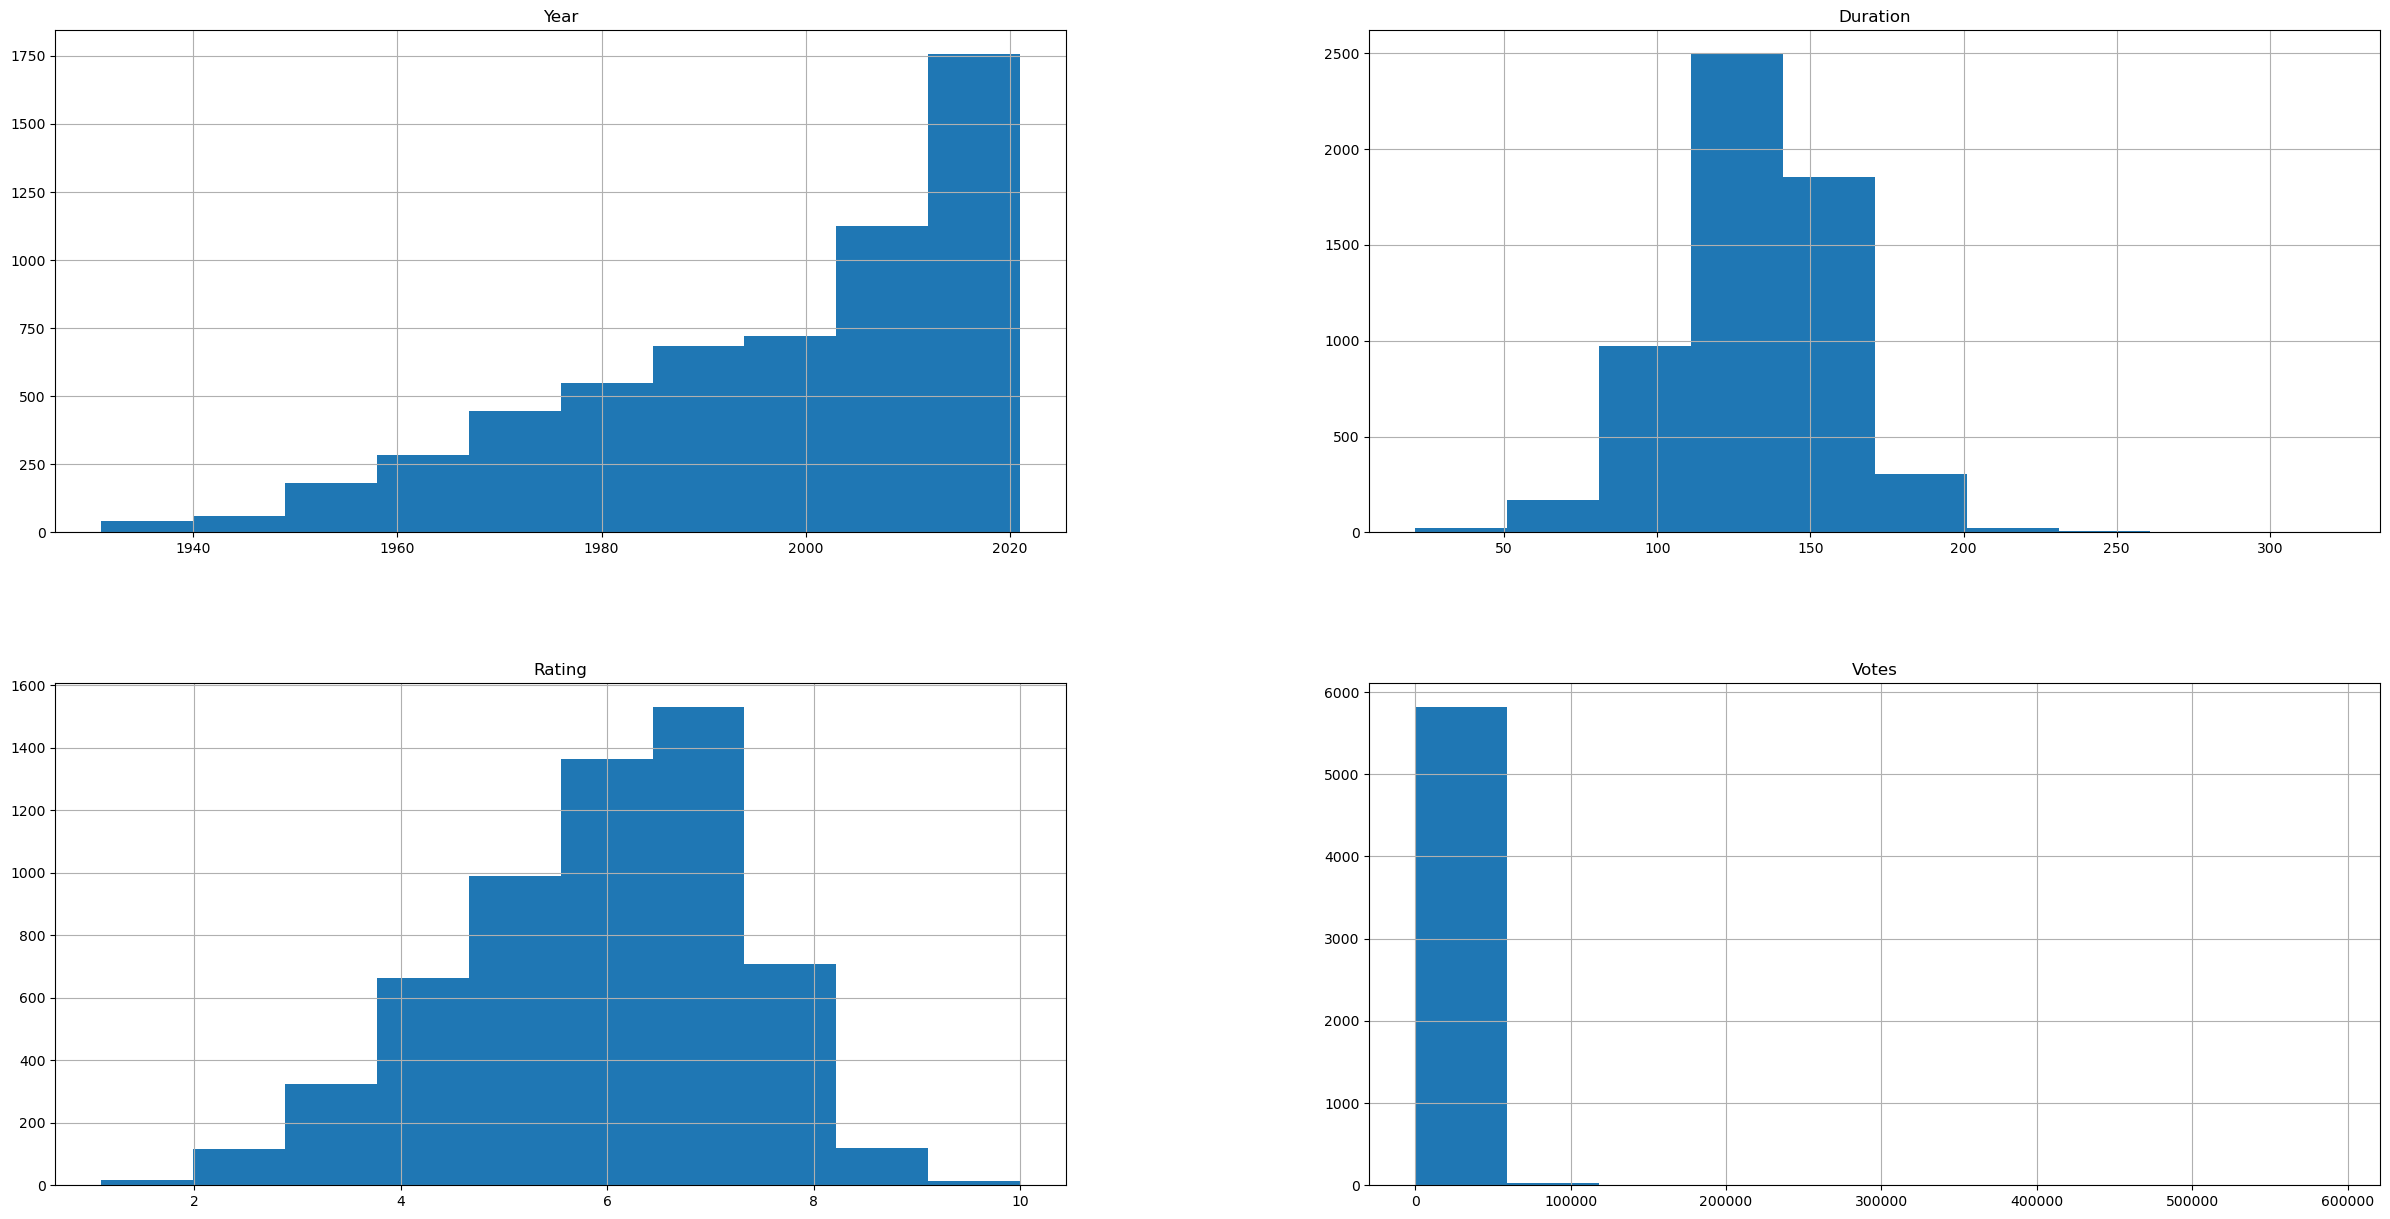

In [30]:
imdb.hist(figsize=(30, 15))

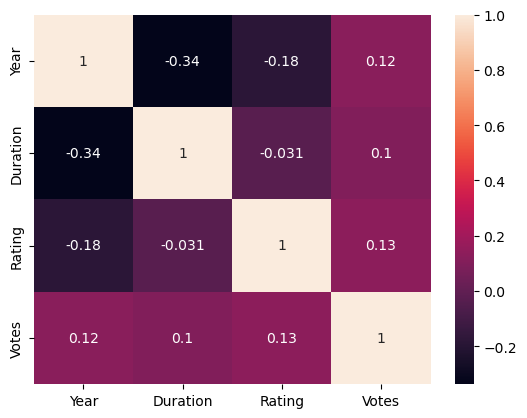

In [32]:
sns.heatmap(imdb.corr(), annot = True)
plt.show()

In [33]:
imdb.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
imdb.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [35]:
x = imdb[['Year','Duration','Votes']]
y = imdb['Rating']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

In [37]:
x_train

,Year,Duration,Votes
9437,2016,108,415
14000,2021,153,11536
13341,1998,156,2757
7254,1999,157,22
9353,1957,119,27
...,...,...,...
3055,2006,150,51
8951,2001,152,24
3494,1997,180,1006
12221,2021,135,3369


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
x_train

array([[ 0.97763816, -0.91330347, -0.15626935],
       [ 1.23037346,  0.77720928,  0.62598316],
       [ 0.06779108,  0.88991013,  0.00846722],
       ...,
       [ 0.01724402,  1.79151692, -0.11469834],
       [ 1.23037346,  0.10100418,  0.05151537],
       [ 0.62380874, -1.13870516, -0.15999738]])

In [41]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test'])

def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = metrics.mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = metrics.mean_absolute_percentage_error(test_act,test_pred)

    dataframe=dataframe.append(pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test],index=scores.columns ), ignore_index=True)

    return(dataframe)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(x_test)
y_pred

array([5.91267051, 5.79165642, 5.44483187, ..., 6.47161321, 5.90416359,
       5.46078532])

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.08372524585056518

In [45]:
scores=get_metrics(y_train, lr.predict(x_train),y_test, lr.predict(x_test),'Lin_model',scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test
0,Lin_model,1.072623,1.831971,1.353503,0.219066,1.045601,1.6848,1.297998,0.205732


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([6.119, 4.308, 4.261, ..., 6.787, 5.063, 5.26 ])

In [48]:
r2_score(y_test, y_pred_rf)

0.2072267116850688

In [49]:
scores=get_metrics(y_train, rf.predict(x_train),y_test, rf.predict(x_test),'rf_model',scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test
0,Lin_model,1.072623,1.831971,1.353503,0.219066,1.045601,1.684800,1.297998,0.205732
1,rf_model,0.354051,0.225325,0.474684,0.072116,0.911957,1.457712,1.207357,0.177637


In [50]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()
xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [51]:
y_pred_xgb = xgb.predict(x_test)
y_pred_xgb

array([5.8311195, 6.0186033, 5.169546 , ..., 6.757103 , 5.1333966,
       5.584782 ], dtype=float32)

In [52]:
r2_score(y_test, y_pred_xgb)

0.27373157644480794

In [53]:
scores=get_metrics(y_train, xgb.predict(x_train),y_test, xgb.predict(x_test),'xgb_model',scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test
0,Lin_model,1.072623,1.831971,1.353503,0.219066,1.045601,1.684800,1.297998,0.205732
1,rf_model,0.354051,0.225325,0.474684,0.072116,0.911957,1.457712,1.207357,0.177637
2,xgb_model,0.878370,1.335966,1.155840,0.181407,0.881539,1.335426,1.155606,0.174494


In [54]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength (higher values increase regularization)

# Train the Ridge Regression model
ridge_model.fit(x_train, y_train)

# Make predictions on the test set using Ridge Regression
y_pred_ridge = ridge_model.predict(x_test)

lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength (higher values increase regularization)

# Train the Lasso Regression model
lasso_model.fit(x_train, y_train)

# Make predictions on the test set using Lasso Regression
y_pred_lasso = lasso_model.predict(x_test)

In [55]:
scores=get_metrics(y_train,ridge_model.predict(x_train),y_test,ridge_model.predict(x_test),'Ridge_model',scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test
0,Lin_model,1.072623,1.831971,1.353503,0.219066,1.045601,1.684800,1.297998,0.205732
1,rf_model,0.354051,0.225325,0.474684,0.072116,0.911957,1.457712,1.207357,0.177637
2,xgb_model,0.878370,1.335966,1.155840,0.181407,0.881539,1.335426,1.155606,0.174494
3,Ridge_model,1.072632,1.831971,1.353503,0.219069,1.045613,1.684815,1.298004,0.205735


In [56]:
scores=get_metrics(y_train,lasso_model.predict(x_train),y_test,lasso_model.predict(x_test),'Lasso_model',scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test
0,Lin_model,1.072623,1.831971,1.353503,0.219066,1.045601,1.684800,1.297998,0.205732
1,rf_model,0.354051,0.225325,0.474684,0.072116,0.911957,1.457712,1.207357,0.177637
2,xgb_model,0.878370,1.335966,1.155840,0.181407,0.881539,1.335426,1.155606,0.174494
3,Ridge_model,1.072632,1.831971,1.353503,0.219069,1.045613,1.684815,1.298004,0.205735
4,Lasso_model,1.098469,1.878827,1.370703,0.224699,1.078471,1.752897,1.323970,0.212172


In [57]:
imdb.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [58]:
new = [[2022, 120, 2000]]

In [59]:
rf.predict(sc.transform(new))

array([6.464])